<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#ANALYSIS" data-toc-modified-id="ANALYSIS-1">ANALYSIS</a></span></li><li><span><a href="#no-self-edge" data-toc-modified-id="no-self-edge-2">no self-edge</a></span></li><li><span><a href="#VIZ" data-toc-modified-id="VIZ-3">VIZ</a></span></li></ul></div>

In [1]:
import numpy as np, string, utils, preprocess
import nltk

In [2]:
np.power(2, 6)

64

In [4]:
quran = utils.load_text("books/quran-shakir.txt")
print(quran[:103])

max_dist = 10

quran_graph, words_map = preprocess.text_to_graph(quran, ignore_stopwords=True, return_words_map=True, max_dist=max_dist, max_weight=np.power(2, max_dist))
print("Sparsity: {:05.2f}%".format(100 * (1 - np.count_nonzero(quran_graph) / quran_graph.size)))

In the name of Allah, the Beneficent, the Merciful.
All praise is due to Allah, the Lord of the Worlds
Sparsity: 99.28%


In [5]:
#book_lems = preprocess.words_lems(quran, lower=True)
#words_map = preprocess.words_to_int(book_lems, ignore_punct=True)

In [6]:
quran_graph.shape

(3990, 3990)

In [8]:
#word_map_used_inv[np.argmin(quran_graph.sum(axis=0))]

In [9]:
np.argmin(quran_graph.sum(axis=0))

1185

In [10]:
(quran_graph.sum(axis=0) == 0).sum()

1

In [11]:
word_map_used_inv = {i[1]:i[0] for i in words_map.items()}

In [12]:
def get_adjacent(word, n=10, word_map_used=words_map):
    index = word_map_used[word]
    for i in range(n):
        print(word_map_used_inv[np.argsort(quran_graph[index])[::-1][i]])

In [13]:
word_map_used_inv[0]

'read'

# ANALYSIS

In [14]:
import networkx as nx
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import sparse, stats, spatial
from sklearn import preprocessing, decomposition, model_selection

%matplotlib inline
sns.set(rc={"figure.figsize": (15, 6)})
sns.set_palette(sns.color_palette("Set2", 10))

# no self-edge

In [15]:
for i in range(quran_graph.shape[0]):
    quran_graph[i, i] = 0

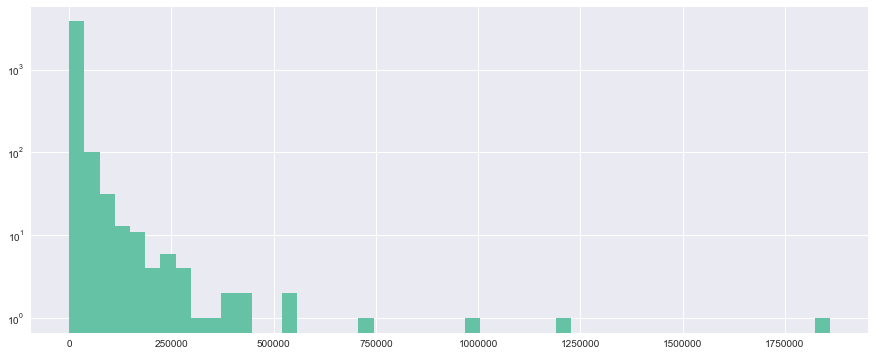

In [20]:
degrees = np.sum(quran_graph, axis=1)

plt.hist(degrees, bins=50, log=True);

In [21]:
D = np.diag(degrees)
W = quran_graph
L = D - W

In [22]:
inv_sqrt_D = np.diag(1 / np.diag(D**(0.5)))

In [23]:
normalized_laplacian = inv_sqrt_D @ L @ inv_sqrt_D

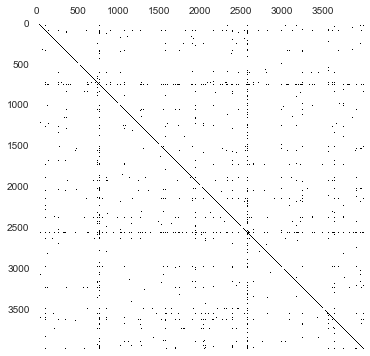

In [24]:
plt.spy(normalized_laplacian);

In [25]:
eigenvalues, eigenvectors = sparse.linalg.eigsh(normalized_laplacian, k=10, which='SM') # which='SA' gives us similar results

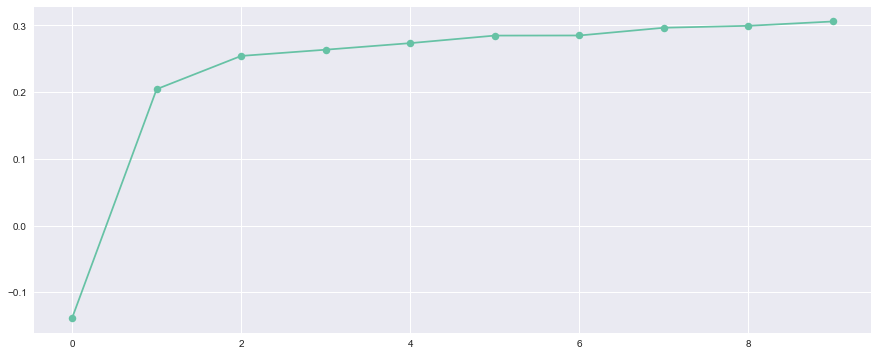

In [26]:
plt.plot(eigenvalues, '.-', markersize=15);

In [27]:
G = nx.from_numpy_matrix(L)
gc = max(nx.connected_component_subgraphs(G), key=len)

In [28]:
assert len(gc.nodes()) == W.shape[0], "GCC should contain all nodes"

# VIZ

In [32]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

In [33]:
init_notebook_mode(connected=True)
print(__version__)

2.2.2


In [37]:
trace = go.Scatter3d(
    x=eigenvectors[:, 1],
    y=eigenvectors[:, 2],
    z=eigenvectors[:, 3],
    name='a',
    mode='markers',
    marker=dict(
        size=12,
        color='b',
        #colorscale='Viridis',
        #opacity=0.8,
        line=dict(
            width=2,
            color='black'
        )
    )
)

In [38]:
layout = go.Layout(
    hovermode= 'closest',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)

In [39]:
data = [trace]

fig = go.Figure(data=data, layout=layout)
iplot(fig)